In [1]:
import pymc as pm
import pandas as pd
import numpy as np


In [2]:
pymc_data = pd.read_csv('pymc_data.csv')
pymc_data

,Unnamed: 0,BCUT2D_CHGHI,BCUT2D_MRLOW,Chi0,Chi0n,Chi1,Chi1v,Chi2v,Chi3v,EState_VSA3,...,fr_nitro_arom,fr_phenol,fr_phenol_noOrthoHbond,fr_unbrch_alkane,outcome,Tissue_Type4,Cell_Type,Gender,Organism,Tissue_Type2
0,0,2.078754,1.305165,13.363597,10.146223,9.882143,9.723362,8.746527,7.776120,0.000000,...,0,0,0,0,0.0,Normal,epithelial,F,Human,kidney
1,1,2.255721,-0.139545,6.853371,4.755274,4.198377,2.721007,1.997013,1.293389,12.841643,...,0,0,0,0,0.0,Normal,epithelial,F,Human,kidney
2,2,2.114966,-0.117299,11.966255,10.617461,7.647066,5.746835,3.979984,2.496743,0.000000,...,0,0,0,0,0.0,Normal,epithelial,F,Human,kidney
3,3,2.061405,-0.146178,5.112884,4.144924,3.393847,2.550477,1.677577,1.038288,13.027704,...,0,0,0,0,0.0,Normal,epithelial,F,Human,kidney
4,4,2.131712,-0.136469,13.828063,10.550274,9.130229,5.939368,4.177882,2.970318,11.312963,...,0,0,0,0,0.0,Normal,epithelial,F,Human,kidney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,695,1.801405,1.667832,5.983128,4.464102,3.787694,2.398717,1.666667,0.936467,0.000000,...,0,0,0,0,1.0,Primary,epithelial-like,M,Human,liver
396,696,2.392932,-0.042609,20.148054,16.438751,13.309663,11.555691,9.180429,5.588160,24.443417,...,0,0,0,0,1.0,Primary,epithelial-like,M,Human,liver
397,697,2.099693,1.532659,13.689870,11.773503,9.770857,7.065384,5.504843,4.443108,0.000000,...,0,0,0,0,1.0,Primary,epithelial-like,M,Human,liver
398,698,2.196300,0.094582,20.924074,17.759732,14.614194,10.900909,8.366904,5.981752,17.130841,...,0,0,0,0,1.0,Primary,epithelial-like,M,Human,liver


In [3]:
pymc_data.loc[pymc_data["outcome"] == 1, "outcome"] = 'active antagonist'
pymc_data.loc[pymc_data["outcome"] == 0, "outcome"] = 'inactive'

In [4]:
pymc_data

,Unnamed: 0,BCUT2D_CHGHI,BCUT2D_MRLOW,Chi0,Chi0n,Chi1,Chi1v,Chi2v,Chi3v,EState_VSA3,...,fr_nitro_arom,fr_phenol,fr_phenol_noOrthoHbond,fr_unbrch_alkane,outcome,Tissue_Type4,Cell_Type,Gender,Organism,Tissue_Type2
0,0,2.078754,1.305165,13.363597,10.146223,9.882143,9.723362,8.746527,7.776120,0.000000,...,0,0,0,0,inactive,Normal,epithelial,F,Human,kidney
1,1,2.255721,-0.139545,6.853371,4.755274,4.198377,2.721007,1.997013,1.293389,12.841643,...,0,0,0,0,inactive,Normal,epithelial,F,Human,kidney
2,2,2.114966,-0.117299,11.966255,10.617461,7.647066,5.746835,3.979984,2.496743,0.000000,...,0,0,0,0,inactive,Normal,epithelial,F,Human,kidney
3,3,2.061405,-0.146178,5.112884,4.144924,3.393847,2.550477,1.677577,1.038288,13.027704,...,0,0,0,0,inactive,Normal,epithelial,F,Human,kidney
4,4,2.131712,-0.136469,13.828063,10.550274,9.130229,5.939368,4.177882,2.970318,11.312963,...,0,0,0,0,inactive,Normal,epithelial,F,Human,kidney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,695,1.801405,1.667832,5.983128,4.464102,3.787694,2.398717,1.666667,0.936467,0.000000,...,0,0,0,0,active antagonist,Primary,epithelial-like,M,Human,liver
396,696,2.392932,-0.042609,20.148054,16.438751,13.309663,11.555691,9.180429,5.588160,24.443417,...,0,0,0,0,active antagonist,Primary,epithelial-like,M,Human,liver
397,697,2.099693,1.532659,13.689870,11.773503,9.770857,7.065384,5.504843,4.443108,0.000000,...,0,0,0,0,active antagonist,Primary,epithelial-like,M,Human,liver
398,698,2.196300,0.094582,20.924074,17.759732,14.614194,10.900909,8.366904,5.981752,17.130841,...,0,0,0,0,active antagonist,Primary,epithelial-like,M,Human,liver


In [5]:
assay_info = pymc_data.iloc[:, 54:]
pymc_data.columns

Index(['Unnamed: 0', 'BCUT2D_CHGHI', 'BCUT2D_MRLOW', 'Chi0', 'Chi0n', 'Chi1',
       'Chi1v', 'Chi2v', 'Chi3v', 'EState_VSA3', 'EState_VSA6', 'EState_VSA7',
       'ExactMolWt', 'FractionCSP3', 'HeavyAtomMolWt', 'Kappa2', 'LabuteASA',
       'MaxPartialCharge', 'MolWt', 'NOCount', 'NumAromaticRings',
       'NumHeteroatoms', 'NumSaturatedCarbocycles', 'PEOE_VSA1', 'PEOE_VSA12',
       'PEOE_VSA13', 'PEOE_VSA6', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA5',
       'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA4', 'VSA_EState10',
       'VSA_EState2', 'VSA_EState3', 'VSA_EState5', 'VSA_EState7',
       'VSA_EState9', 'ProtocolName', 'fr_Ar_OH', 'fr_NH0', 'fr_aniline',
       'fr_benzene', 'fr_halogen', 'fr_ketone', 'fr_nitro', 'fr_nitro_arom',
       'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_unbrch_alkane', 'outcome',
       'Tissue_Type4', 'Cell_Type', 'Gender', 'Organism', 'Tissue_Type2'],
      dtype='object')

In [6]:
assay_info

,Cell_Type,Gender,Organism,Tissue_Type2
0,epithelial,F,Human,kidney
1,epithelial,F,Human,kidney
2,epithelial,F,Human,kidney
3,epithelial,F,Human,kidney
4,epithelial,F,Human,kidney
...,...,...,...,...
395,epithelial-like,M,Human,liver
396,epithelial-like,M,Human,liver
397,epithelial-like,M,Human,liver
398,epithelial-like,M,Human,liver


### Jaleal's code

In [7]:
tox21_two_assays = pymc_data.iloc[:, 1:53]
pymc_assay_sub = ['tox21-ar-bla-antagonist-p1', 'tox21-gh3-tre-antagonist-p1']
tox21_two_assays = tox21_two_assays[tox21_two_assays['ProtocolName'].isin(pymc_assay_sub)]
tox21_two_assays.columns

Index(['BCUT2D_CHGHI', 'BCUT2D_MRLOW', 'Chi0', 'Chi0n', 'Chi1', 'Chi1v',
       'Chi2v', 'Chi3v', 'EState_VSA3', 'EState_VSA6', 'EState_VSA7',
       'ExactMolWt', 'FractionCSP3', 'HeavyAtomMolWt', 'Kappa2', 'LabuteASA',
       'MaxPartialCharge', 'MolWt', 'NOCount', 'NumAromaticRings',
       'NumHeteroatoms', 'NumSaturatedCarbocycles', 'PEOE_VSA1', 'PEOE_VSA12',
       'PEOE_VSA13', 'PEOE_VSA6', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA5',
       'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA4', 'VSA_EState10',
       'VSA_EState2', 'VSA_EState3', 'VSA_EState5', 'VSA_EState7',
       'VSA_EState9', 'ProtocolName', 'fr_Ar_OH', 'fr_NH0', 'fr_aniline',
       'fr_benzene', 'fr_halogen', 'fr_ketone', 'fr_nitro', 'fr_nitro_arom',
       'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_unbrch_alkane', 'outcome'],
      dtype='object')

In [8]:
# tox21_two_assays = pd.read_csv("bayesian-bioassay-model-prototype/data/two-assay-example.csv")

In [9]:
organism = ['human' for i in range(tox21_two_assays.shape[0])] + ['mouse' for i in range(tox21_two_assays.shape[0])]
new_protocol = [i + '-' + v for i,v in zip(pd.concat([tox21_two_assays['ProtocolName'],tox21_two_assays['ProtocolName']]),organism)]
tox21_two_assays['outcome'].value_counts()
tox21_two_assays

,BCUT2D_CHGHI,BCUT2D_MRLOW,Chi0,Chi0n,Chi1,Chi1v,Chi2v,Chi3v,EState_VSA3,EState_VSA6,...,fr_aniline,fr_benzene,fr_halogen,fr_ketone,fr_nitro,fr_nitro_arom,fr_phenol,fr_phenol_noOrthoHbond,fr_unbrch_alkane,outcome
0,2.078754,1.305165,13.363597,10.146223,9.882143,9.723362,8.746527,7.776120,0.000000,44.261368,...,0,2,0,0,0,0,0,0,0,inactive
1,2.255721,-0.139545,6.853371,4.755274,4.198377,2.721007,1.997013,1.293389,12.841643,0.000000,...,0,0,0,0,0,0,0,0,0,inactive
2,2.114966,-0.117299,11.966255,10.617461,7.647066,5.746835,3.979984,2.496743,0.000000,0.000000,...,1,1,1,0,0,0,0,0,0,inactive
3,2.061405,-0.146178,5.112884,4.144924,3.393847,2.550477,1.677577,1.038288,13.027704,0.000000,...,0,0,0,0,0,0,0,0,0,inactive
4,2.131712,-0.136469,13.828063,10.550274,9.130229,5.939368,4.177882,2.970318,11.312963,19.242532,...,0,2,0,1,0,0,0,0,0,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2.106270,-0.401940,19.104084,12.987283,12.346244,6.872630,4.595038,2.727257,0.000000,0.000000,...,0,0,0,0,2,0,0,0,0,active antagonist
296,2.599266,-0.313088,33.388176,28.694025,21.756712,16.840958,14.507601,10.141912,42.747402,20.109555,...,0,0,0,0,0,0,0,0,0,active antagonist
297,2.128752,-0.890356,17.227922,17.553100,11.121320,10.941096,8.332693,5.233990,0.000000,0.000000,...,0,0,1,0,0,0,0,0,12,active antagonist
298,2.117401,1.129662,19.388541,16.769844,12.990402,9.120990,7.028083,4.758934,0.000000,0.000000,...,2,2,0,0,0,0,0,0,0,active antagonist


In [10]:
organism

['human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',


In [11]:
simulated_two_assays = tox21_two_assays.copy()
BCUT2D_CHGHI_scale = (simulated_two_assays['BCUT2D_CHGHI'] - simulated_two_assays['BCUT2D_CHGHI'].min()) / (simulated_two_assays['BCUT2D_CHGHI'].max() - simulated_two_assays['BCUT2D_CHGHI'].min())
BCUT2D_CHGHI_scale


0      0.406139
1      0.491931
2      0.423694
3      0.397728
4      0.431812
         ...   
295    0.419478
296    0.658478
297    0.430377
298    0.424874
299    0.508054
Name: BCUT2D_CHGHI, Length: 200, dtype: float64

In [12]:
import random
new_outcome = []
for i,v in zip(simulated_two_assays['outcome'],BCUT2D_CHGHI_scale/10.0):
    rv = random.random()
    if i == "inactive":
        if (rv + v)>1:
            print((i,v,rv,rv+v))
            new_outcome.append('active antagonist')
        else:
            new_outcome.append(i)
    else:
        if (rv + v)<0.1:
            print((i,v,rv,rv+v))
            new_outcome.append('inactive')
        else:
            new_outcome.append(i)

simulated_two_assays['outcome'] = new_outcome
simulated_two_assays['outcome'].value_counts()

('inactive', 0.04571629536087052, 0.9583746889530176, 1.004090984313888)
('inactive', 0.036441084694916866, 0.9745989668497834, 1.0110400515447002)
('inactive', 0.03266959481719338, 0.9714438497139334, 1.0041134445311268)
('active antagonist', 0.04087714078188905, 0.029846101112541934, 0.070723241894431)
('active antagonist', 0.05324777171134408, 0.018008715479670423, 0.0712564871910145)
('active antagonist', 0.06755208406847327, 0.031908636898086984, 0.09946072096656025)
('inactive', 0.03625585022930763, 0.9863313902394214, 1.022587240468729)
('inactive', 0.02870101747741703, 0.9808000025425024, 1.0095010200199195)
('inactive', 0.03515509512494625, 0.9779690181381802, 1.0131241132631263)
('inactive', 0.05576364601289803, 0.9701941026286768, 1.0259577486415747)
('active antagonist', 0.03422819829103628, 0.02708894018526875, 0.06131713847630503)
('active antagonist', 0.035040503411564825, 0.04061719570778677, 0.07565769911935159)


active antagonist    102
inactive              98
Name: outcome, dtype: int64

In [13]:
simulated_two_assays

,BCUT2D_CHGHI,BCUT2D_MRLOW,Chi0,Chi0n,Chi1,Chi1v,Chi2v,Chi3v,EState_VSA3,EState_VSA6,...,fr_aniline,fr_benzene,fr_halogen,fr_ketone,fr_nitro,fr_nitro_arom,fr_phenol,fr_phenol_noOrthoHbond,fr_unbrch_alkane,outcome
0,2.078754,1.305165,13.363597,10.146223,9.882143,9.723362,8.746527,7.776120,0.000000,44.261368,...,0,2,0,0,0,0,0,0,0,inactive
1,2.255721,-0.139545,6.853371,4.755274,4.198377,2.721007,1.997013,1.293389,12.841643,0.000000,...,0,0,0,0,0,0,0,0,0,inactive
2,2.114966,-0.117299,11.966255,10.617461,7.647066,5.746835,3.979984,2.496743,0.000000,0.000000,...,1,1,1,0,0,0,0,0,0,inactive
3,2.061405,-0.146178,5.112884,4.144924,3.393847,2.550477,1.677577,1.038288,13.027704,0.000000,...,0,0,0,0,0,0,0,0,0,inactive
4,2.131712,-0.136469,13.828063,10.550274,9.130229,5.939368,4.177882,2.970318,11.312963,19.242532,...,0,2,0,1,0,0,0,0,0,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2.106270,-0.401940,19.104084,12.987283,12.346244,6.872630,4.595038,2.727257,0.000000,0.000000,...,0,0,0,0,2,0,0,0,0,active antagonist
296,2.599266,-0.313088,33.388176,28.694025,21.756712,16.840958,14.507601,10.141912,42.747402,20.109555,...,0,0,0,0,0,0,0,0,0,active antagonist
297,2.128752,-0.890356,17.227922,17.553100,11.121320,10.941096,8.332693,5.233990,0.000000,0.000000,...,0,0,1,0,0,0,0,0,12,active antagonist
298,2.117401,1.129662,19.388541,16.769844,12.990402,9.120990,7.028083,4.758934,0.000000,0.000000,...,2,2,0,0,0,0,0,0,0,active antagonist


In [14]:
four_assay_simulated = pd.concat([tox21_two_assays,simulated_two_assays])
four_assay_simulated['PROTOCOL_NAME'] = new_protocol
four_assay_simulated.insert(2,'ORGANISM',organism)
four_assay_simulated.reset_index(drop=True,inplace=True)
four_assay_simulated.head()


,BCUT2D_CHGHI,BCUT2D_MRLOW,ORGANISM,Chi0,Chi0n,Chi1,Chi1v,Chi2v,Chi3v,EState_VSA3,...,fr_benzene,fr_halogen,fr_ketone,fr_nitro,fr_nitro_arom,fr_phenol,fr_phenol_noOrthoHbond,fr_unbrch_alkane,outcome,PROTOCOL_NAME
0,2.078754,1.305165,human,13.363597,10.146223,9.882143,9.723362,8.746527,7.776120,0.000000,...,2,0,0,0,0,0,0,0,inactive,tox21-ar-bla-antagonist-p1-human
1,2.255721,-0.139545,human,6.853371,4.755274,4.198377,2.721007,1.997013,1.293389,12.841643,...,0,0,0,0,0,0,0,0,inactive,tox21-ar-bla-antagonist-p1-human
2,2.114966,-0.117299,human,11.966255,10.617461,7.647066,5.746835,3.979984,2.496743,0.000000,...,1,1,0,0,0,0,0,0,inactive,tox21-ar-bla-antagonist-p1-human
3,2.061405,-0.146178,human,5.112884,4.144924,3.393847,2.550477,1.677577,1.038288,13.027704,...,0,0,0,0,0,0,0,0,inactive,tox21-ar-bla-antagonist-p1-human
4,2.131712,-0.136469,human,13.828063,10.550274,9.130229,5.939368,4.177882,2.970318,11.312963,...,2,0,1,0,0,0,0,0,inactive,tox21-ar-bla-antagonist-p1-human


In [15]:
four_assay_simulated.tail()

,BCUT2D_CHGHI,BCUT2D_MRLOW,ORGANISM,Chi0,Chi0n,Chi1,Chi1v,Chi2v,Chi3v,EState_VSA3,...,fr_benzene,fr_halogen,fr_ketone,fr_nitro,fr_nitro_arom,fr_phenol,fr_phenol_noOrthoHbond,fr_unbrch_alkane,outcome,PROTOCOL_NAME
395,2.106270,-0.401940,mouse,19.104084,12.987283,12.346244,6.872630,4.595038,2.727257,0.000000,...,0,0,0,2,0,0,0,0,active antagonist,tox21-gh3-tre-antagonist-p1-mouse
396,2.599266,-0.313088,mouse,33.388176,28.694025,21.756712,16.840958,14.507601,10.141912,42.747402,...,0,0,0,0,0,0,0,0,active antagonist,tox21-gh3-tre-antagonist-p1-mouse
397,2.128752,-0.890356,mouse,17.227922,17.553100,11.121320,10.941096,8.332693,5.233990,0.000000,...,0,1,0,0,0,0,0,12,active antagonist,tox21-gh3-tre-antagonist-p1-mouse
398,2.117401,1.129662,mouse,19.388541,16.769844,12.990402,9.120990,7.028083,4.758934,0.000000,...,2,0,0,0,0,0,0,0,active antagonist,tox21-gh3-tre-antagonist-p1-mouse
399,2.288980,0.197485,mouse,14.940947,13.572747,10.809663,9.169458,7.820277,6.283280,5.917906,...,2,1,0,0,0,0,0,0,active antagonist,tox21-gh3-tre-antagonist-p1-mouse


In [16]:
four_assay_simulated.outcome.value_counts()
# print(len(new_protocol))

active antagonist    202
inactive             198
Name: outcome, dtype: int64

In [17]:
simulated_protocols = pd.factorize(four_assay_simulated.PROTOCOL_NAME)
#To busy to figure out the right way to do this
organisms = [0,0,1,1]
X4_bayes = four_assay_simulated[['BCUT2D_CHGHI', 'BCUT2D_MRLOW','Chi0']]
X4_bayes.insert(0,'Intercept',1)
X4_bayes = np.asarray(X4_bayes)
Y4_bayes = pd.factorize(four_assay_simulated.outcome)
coords_simulated = {
    'obs_id': np.arange(X4_bayes.shape[0]),
    'protocol':list(simulated_protocols[1]),
    'params':['beta_{0}'.format(i) for i in range(X4_bayes.shape[1])]
}

In [18]:
print(X4_bayes.shape)
X4_bayes

(400, 4)


array([[ 1.        ,  2.07875434,  1.30516542, 13.36359655],
       [ 1.        ,  2.25572093, -0.13954485,  6.85337115],
       [ 1.        ,  2.11496625, -0.11729913, 11.96625533],
       ...,
       [ 1.        ,  2.12875181, -0.89035566, 17.22792206],
       [ 1.        ,  2.11740067,  1.12966151, 19.38854058],
       [ 1.        ,  2.28897951,  0.19748529, 14.94094682]])

In [19]:
coords_simulated

{'obs_id': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175

In [20]:
simulated_protocols

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [21]:
import aesara.tensor as T
#https://docs.pymc.io/en/v3/pymc-examples/examples/case_studies/multilevel_modeling.html
with pm.Model(coords=coords_simulated) as assay_level_model:
    protocol_idx = pm.Data("protocol_idx", list(simulated_protocols[0]),dims='obs_id')
    organism_idx = pm.Data("organism_idx", organisms, dims="protocol")
    
    # prior stddev in intercepts & slopes (variation across protocol):
    sd_dist = pm.Exponential.dist(1)
    
    # get back standard deviations and rho:
    chol, corr, stds = pm.LKJCholeskyCov("chol", n=X4_bayes.shape[1], eta=2.0, sd_dist=sd_dist, compute_corr=True)
    
    #hyperpriors and priors for average betas:
    beta_list = []
    for i in range(X4_bayes.shape[1]):
        gbeta = pm.Normal("g_beta_{0}".format(i), mu=0.0, sigma=10.0, shape=2)
        mu_gbeta = gbeta[0] + gbeta[1] * organism_idx
        beta_list.append(pm.Normal('beta_{0}'.format(i), mu=mu_gbeta,sigma=3.0,dims="protocol"))
    
    #population of varying protocol effects:
    beta_protocol = pm.MvNormal("beta_protocol", mu=T.stack(beta_list), chol=chol,dims=('protocol','params'))
    
    #Expected value per protocol:
    theta = beta_protocol[protocol_idx,0]* X4_bayes[:,0]
    for i in range(1,X4_bayes.shape[1]):
        theta += beta_protocol[protocol_idx,i] * X4_bayes[:,i]
        print(theta)
    p = 1.0 / (1.0 + T.exp(-theta ))
    likelihood = pm.Bernoulli('likelihood', p, observed=Y4_bayes[0],dims="obs_id")

/opt/anaconda3/lib/python3.9/site-packages/pymc/data.py:647: FutureWarning: The `mutable` kwarg was not specified. Currently it defaults to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default will change to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Set `pm.Data(..., mutable=False/True)`, or use `pm.ConstantData`/`pm.MutableData`.
  warnings.warn(


Elemwise{add,no_inplace}.0
Elemwise{add,no_inplace}.0
Elemwise{add,no_inplace}.0


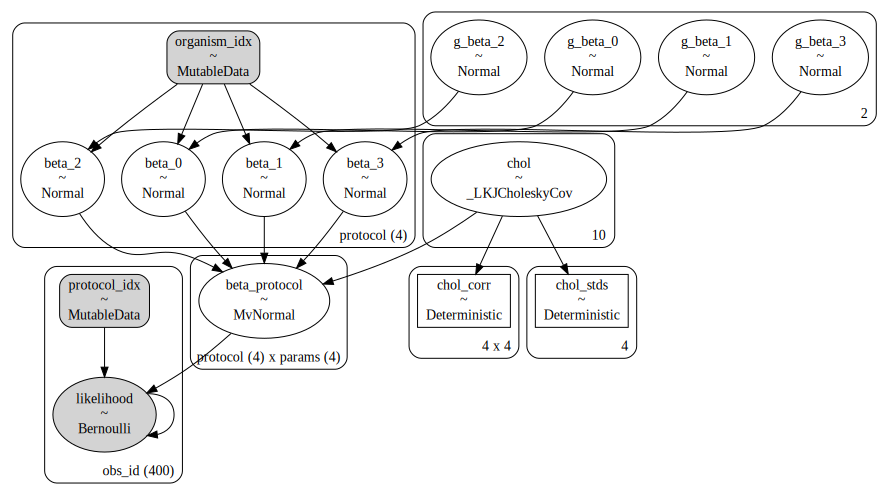

In [22]:

pm.model_to_graphviz(assay_level_model)

In [48]:
# Run the model, error
with assay_level_model:
    tr_assay = pm.sample(500, tune=500, init="adapt_diag", chains=4,cores=8)

/opt/anaconda3/lib/python3.9/site-packages/pymc/aesaraf.py:1005: UserWarning: The parameter 'updates' of aesara.function() expects an OrderedDict, got <class 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (collections.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just convert your dictionary to this type before the call as the conversion will still be non-deterministic.
  aesara_function = aesara.function(
/opt/anaconda3/lib/python3.9/site-packages/pymc/aesaraf.py:1005: UserWarning: The parameter 'updates' of aesara.function() expects an OrderedDict, got <class 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (collections.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just convert your dictionary to this type before the call as the conversion 

Sampling 4 chains for 500 tune and 500 draw iterations (2_000 + 2_000 draws total) took 183 seconds.
There were 70 divergences after tuning. Increase `target_accept` or reparameterize.
There were 39 divergences after tuning. Increase `target_accept` or reparameterize.
There were 54 divergences after tuning. Increase `target_accept` or reparameterize.
There were 51 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


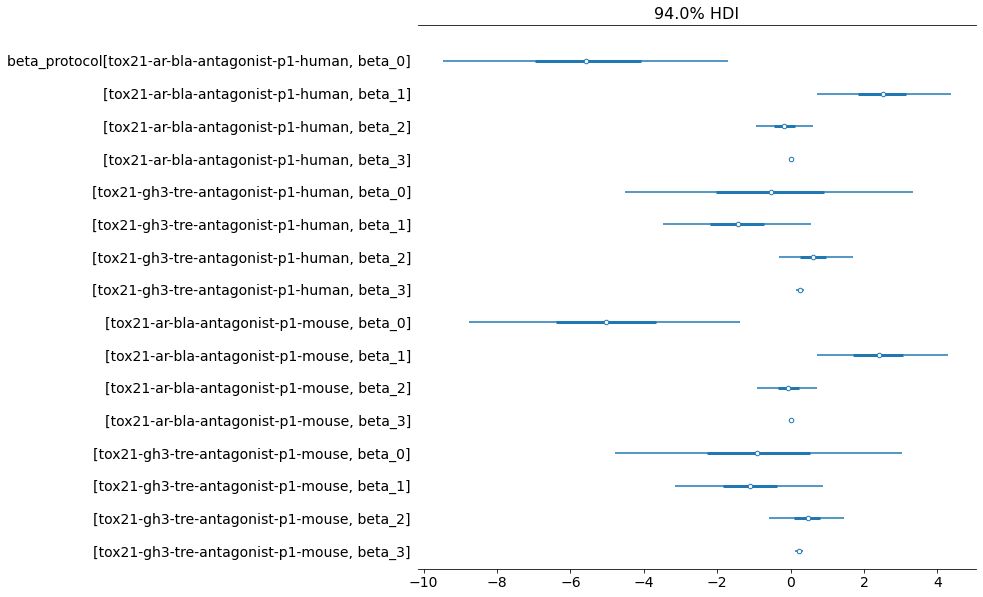

In [49]:
# Display results, error
import arviz as az
with assay_level_model:
    az.plot_forest(
        tr_assay,
        combined=True,
        var_names=["beta_protocol"],
        figsize=(10, 10),
        textsize=14,
    )

In [72]:
tr_assay

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data
	> constant_data

In [73]:
with assay_level_model:
    display(az.summary(tr_assay, round_to=2))

/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
g_beta_0[0],-1.33,2.57,-6.04,3.59,0.11,0.08,573.94,488.93,1.01
g_beta_0[1],1.27,3.34,-4.88,7.50,0.14,0.11,611.24,500.94,1.01
beta_0[tox21-ar-bla-antagonist-p1-human],-4.56,2.47,-8.98,0.17,0.11,0.08,536.00,695.05,1.00
beta_0[tox21-gh3-tre-antagonist-p1-human],1.78,1.80,-1.45,4.95,0.08,0.06,640.12,434.21,1.01
beta_0[tox21-ar-bla-antagonist-p1-mouse],-0.18,1.09,-2.53,1.78,0.05,0.05,450.92,515.45,1.01
...,...,...,...,...,...,...,...,...,...
"chol_corr[3, 3]",1.00,0.00,1.00,1.00,0.00,0.00,1848.65,1939.98,1.00
chol_stds[0],1.41,1.24,0.12,3.72,0.08,0.05,276.26,303.69,1.02
chol_stds[1],1.16,1.13,0.08,3.30,0.10,0.07,107.83,69.78,1.05
chol_stds[2],0.85,0.71,0.06,2.05,0.05,0.03,232.49,306.23,1.01


In [77]:
with assay_level_model:
    ppc = pm.sample_posterior_predictive(tr_assay, random_seed=111)
az.plot_ppc(az.from_pymc(posterior_predictive=ppc, model=assay_level_model))

/var/folders/mw/vsqjplld57v73jz2c0hw5x00llg6y6/T/ipykernel_89379/1313757837.py:2: FutureWarning: In this version, RNG seeding is managed by the Model objects. See the `rng_seeder` argument in Model's constructor.
  ppc = pm.sample_posterior_predictive(tr_assay, random_seed=111)


AttributeError: module 'arviz' has no attribute 'from_pymc'

### Try our code

In [8]:
assay_info['ProtocolName'] = pymc_data['ProtocolName']
assay_info

,Cell_Type,Gender,Organism,Tissue_Type2,ProtocolName
0,epithelial,F,Human,kidney,tox21-ar-bla-antagonist-p1
1,epithelial,F,Human,kidney,tox21-ar-bla-antagonist-p1
2,epithelial,F,Human,kidney,tox21-ar-bla-antagonist-p1
3,epithelial,F,Human,kidney,tox21-ar-bla-antagonist-p1
4,epithelial,F,Human,kidney,tox21-ar-bla-antagonist-p1
...,...,...,...,...,...
395,epithelial-like,M,Human,liver,tox21-ahr-p1
396,epithelial-like,M,Human,liver,tox21-ahr-p1
397,epithelial-like,M,Human,liver,tox21-ahr-p1
398,epithelial-like,M,Human,liver,tox21-ahr-p1


In [9]:
assay_info.describe()

,Cell_Type,Gender,Organism,Tissue_Type2,ProtocolName
count,400,400,400,400,400
unique,2,2,2,3,4
top,epithelial,F,Human,kidney,tox21-ar-bla-antagonist-p1
freq,300,300,300,200,100


In [10]:
chem_des = pymc_data.iloc[:, 1:53]
chem_des.outcome.value_counts()

inactive             200
active antagonist    200
Name: outcome, dtype: int64

In [11]:
chem_des.outcome = chem_des.outcome.astype(object)
chem_des.describe()

,BCUT2D_CHGHI,BCUT2D_MRLOW,Chi0,Chi0n,Chi1,Chi1v,Chi2v,Chi3v,EState_VSA3,EState_VSA6,...,fr_NH0,fr_aniline,fr_benzene,fr_halogen,fr_ketone,fr_nitro,fr_nitro_arom,fr_phenol,fr_phenol_noOrthoHbond,fr_unbrch_alkane
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,2.196607,0.094717,16.420961,13.148500,10.602430,8.110878,6.458427,4.483895,12.164366,10.067100,...,0.947500,0.335000,1.055000,0.917500,0.107500,0.055000,0.047500,0.310000,0.305000,0.885000
std,0.235678,0.493623,10.971557,8.642877,7.070907,5.254578,4.461554,3.468107,15.253228,13.575286,...,1.195121,0.688447,1.146849,1.538379,0.395392,0.286671,0.265367,1.855399,1.850821,3.054521
min,1.240992,-1.998501,2.707107,1.985599,1.414214,0.813053,0.235702,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.041222,-0.140866,9.834481,7.765161,6.249010,4.652983,3.354264,2.021129,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.186193,-0.026859,14.214996,11.302755,9.422631,7.199927,5.629867,3.661637,6.792942,6.066367,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.336274,0.286054,19.801275,16.252219,13.096502,10.050510,8.289359,5.793819,17.627422,13.847474,...,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.303739,1.667832,89.381682,59.894417,57.351987,33.919614,26.092602,18.414814,121.327341,76.225885,...,7.000000,4.000000,10.000000,10.000000,3.000000,2.000000,2.000000,25.000000,25.000000,35.000000


In [12]:
chem_des.ProtocolName

0      tox21-ar-bla-antagonist-p1
1      tox21-ar-bla-antagonist-p1
2      tox21-ar-bla-antagonist-p1
3      tox21-ar-bla-antagonist-p1
4      tox21-ar-bla-antagonist-p1
                  ...            
395                  tox21-ahr-p1
396                  tox21-ahr-p1
397                  tox21-ahr-p1
398                  tox21-ahr-p1
399                  tox21-ahr-p1
Name: ProtocolName, Length: 400, dtype: object

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,LabelBinarizer
numeric_columns=list(chem_des.select_dtypes(['float64', 'int64']).columns)
categorical_columns=list(chem_des.select_dtypes('object').columns)
print(len(numeric_columns))

pipeline=ColumnTransformer([
    ('num',StandardScaler(),numeric_columns),
    ('cat', 'passthrough', categorical_columns)])

chem_des_scale=pipeline.fit_transform(chem_des)
chem_des_scale = pd.DataFrame(chem_des_scale)
chem_des_scale

50


,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.500683,2.455243,-0.279012,-0.347805,-0.101994,0.307256,0.51349,0.950475,-0.798493,2.522016,...,0.825029,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ar-bla-antagonist-p1,inactive
1,0.25114,-0.47517,-0.873128,-0.972331,-0.906825,-1.027032,-1.001221,-0.921108,0.044458,-0.742504,...,-0.921064,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ar-bla-antagonist-p1,inactive
2,-0.346841,-0.430047,-0.406532,-0.293214,-0.418485,-0.450465,-0.556207,-0.573697,-0.798493,-0.742504,...,-0.048018,0.053695,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ar-bla-antagonist-p1,inactive
3,-0.574388,-0.488624,-1.031963,-1.043038,-1.020748,-1.059527,-1.072908,-0.994757,0.056671,-0.742504,...,-0.921064,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ar-bla-antagonist-p1,inactive
4,-0.2757,-0.46893,-0.236625,-0.300997,-0.208466,-0.413778,-0.511795,-0.436974,-0.055888,0.676739,...,0.825029,-0.597154,2.260082,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ar-bla-antagonist-p1,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.67897,3.190868,-0.952545,-1.006062,-0.964978,-1.088444,-1.075357,-1.024153,-0.798493,1.047208,...,-0.048018,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ahr-p1,active antagonist
396,0.834067,-0.278548,0.34013,0.381166,0.383349,0.656404,0.610866,0.318804,0.806021,-0.742504,...,0.825029,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ahr-p1,active antagonist
397,-0.411726,2.916686,-0.249236,-0.159289,-0.117752,-0.199217,-0.214001,-0.011775,-0.798493,-0.742504,...,2.571121,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ahr-p1,active antagonist
398,-0.001305,-0.000274,0.410949,0.534198,0.568072,0.531636,0.428296,0.432435,0.326009,1.047208,...,1.698075,0.704544,2.260082,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ahr-p1,active antagonist


In [14]:
col_name = list(chem_des.columns)
col_name.remove('ProtocolName')
col_name.remove('outcome')
col_name.append('ProtocolName')
col_name.append('outcome')
print(col_name)

['BCUT2D_CHGHI', 'BCUT2D_MRLOW', 'Chi0', 'Chi0n', 'Chi1', 'Chi1v', 'Chi2v', 'Chi3v', 'EState_VSA3', 'EState_VSA6', 'EState_VSA7', 'ExactMolWt', 'FractionCSP3', 'HeavyAtomMolWt', 'Kappa2', 'LabuteASA', 'MaxPartialCharge', 'MolWt', 'NOCount', 'NumAromaticRings', 'NumHeteroatoms', 'NumSaturatedCarbocycles', 'PEOE_VSA1', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA6', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA5', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA4', 'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState5', 'VSA_EState7', 'VSA_EState9', 'fr_Ar_OH', 'fr_NH0', 'fr_aniline', 'fr_benzene', 'fr_halogen', 'fr_ketone', 'fr_nitro', 'fr_nitro_arom', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_unbrch_alkane', 'ProtocolName', 'outcome']


In [15]:
chem_des_scale.columns = col_name
chem_des_scale

,BCUT2D_CHGHI,BCUT2D_MRLOW,Chi0,Chi0n,Chi1,Chi1v,Chi2v,Chi3v,EState_VSA3,EState_VSA6,...,fr_benzene,fr_halogen,fr_ketone,fr_nitro,fr_nitro_arom,fr_phenol,fr_phenol_noOrthoHbond,fr_unbrch_alkane,ProtocolName,outcome
0,-0.500683,2.455243,-0.279012,-0.347805,-0.101994,0.307256,0.51349,0.950475,-0.798493,2.522016,...,0.825029,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ar-bla-antagonist-p1,inactive
1,0.25114,-0.47517,-0.873128,-0.972331,-0.906825,-1.027032,-1.001221,-0.921108,0.044458,-0.742504,...,-0.921064,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ar-bla-antagonist-p1,inactive
2,-0.346841,-0.430047,-0.406532,-0.293214,-0.418485,-0.450465,-0.556207,-0.573697,-0.798493,-0.742504,...,-0.048018,0.053695,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ar-bla-antagonist-p1,inactive
3,-0.574388,-0.488624,-1.031963,-1.043038,-1.020748,-1.059527,-1.072908,-0.994757,0.056671,-0.742504,...,-0.921064,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ar-bla-antagonist-p1,inactive
4,-0.2757,-0.46893,-0.236625,-0.300997,-0.208466,-0.413778,-0.511795,-0.436974,-0.055888,0.676739,...,0.825029,-0.597154,2.260082,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ar-bla-antagonist-p1,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.67897,3.190868,-0.952545,-1.006062,-0.964978,-1.088444,-1.075357,-1.024153,-0.798493,1.047208,...,-0.048018,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ahr-p1,active antagonist
396,0.834067,-0.278548,0.34013,0.381166,0.383349,0.656404,0.610866,0.318804,0.806021,-0.742504,...,0.825029,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ahr-p1,active antagonist
397,-0.411726,2.916686,-0.249236,-0.159289,-0.117752,-0.199217,-0.214001,-0.011775,-0.798493,-0.742504,...,2.571121,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ahr-p1,active antagonist
398,-0.001305,-0.000274,0.410949,0.534198,0.568072,0.531636,0.428296,0.432435,0.326009,1.047208,...,1.698075,0.704544,2.260082,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ahr-p1,active antagonist


In [18]:
# simulated_protocols = pd.factorize(four_assay_simulated.PROTOCOL_NAME)
simulated_protocols = pd.factorize(chem_des.ProtocolName)
#To busy to figure out the right way to do this
from sklearn.model_selection import train_test_split
X = chem_des_scale.iloc[:, :50]
y = chem_des_scale['outcome']
X

,BCUT2D_CHGHI,BCUT2D_MRLOW,Chi0,Chi0n,Chi1,Chi1v,Chi2v,Chi3v,EState_VSA3,EState_VSA6,...,fr_NH0,fr_aniline,fr_benzene,fr_halogen,fr_ketone,fr_nitro,fr_nitro_arom,fr_phenol,fr_phenol_noOrthoHbond,fr_unbrch_alkane
0,-0.500683,2.455243,-0.279012,-0.347805,-0.101994,0.307256,0.51349,0.950475,-0.798493,2.522016,...,0.881767,-0.487212,0.825029,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097
1,0.25114,-0.47517,-0.873128,-0.972331,-0.906825,-1.027032,-1.001221,-0.921108,0.044458,-0.742504,...,-0.7938,-0.487212,-0.921064,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097
2,-0.346841,-0.430047,-0.406532,-0.293214,-0.418485,-0.450465,-0.556207,-0.573697,-0.798493,-0.742504,...,-0.7938,0.967151,-0.048018,0.053695,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097
3,-0.574388,-0.488624,-1.031963,-1.043038,-1.020748,-1.059527,-1.072908,-0.994757,0.056671,-0.742504,...,-0.7938,-0.487212,-0.921064,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097
4,-0.2757,-0.46893,-0.236625,-0.300997,-0.208466,-0.413778,-0.511795,-0.436974,-0.055888,0.676739,...,-0.7938,-0.487212,0.825029,-0.597154,2.260082,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.67897,3.190868,-0.952545,-1.006062,-0.964978,-1.088444,-1.075357,-1.024153,-0.798493,1.047208,...,-0.7938,2.421514,-0.048018,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097
396,0.834067,-0.278548,0.34013,0.381166,0.383349,0.656404,0.610866,0.318804,0.806021,-0.742504,...,0.043984,-0.487212,0.825029,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097
397,-0.411726,2.916686,-0.249236,-0.159289,-0.117752,-0.199217,-0.214001,-0.011775,-0.798493,-0.742504,...,-0.7938,-0.487212,2.571121,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097
398,-0.001305,-0.000274,0.410949,0.534198,0.568072,0.531636,0.428296,0.432435,0.326009,1.047208,...,0.881767,2.421514,1.698075,0.704544,2.260082,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X4_bayes = X_train[['BCUT2D_CHGHI', 'BCUT2D_MRLOW', 'Chi0', 'Chi0n']]
# X4_bayes = X_train.iloc[:,:20]
# X4_bayes = X_train
print(X4_bayes)
X4_bayes.insert(0,'Intercept',1)
X4_bayes = np.asarray(X4_bayes)
Y4_bayes = pd.factorize(y_train)
proto_name = ['tox21-ar-bla-antagonist-p1', 'tox21-gh3-tre-antagonist-p1', 'tox21-ahr-p1', 'tox21-erb-bla-p1']
coords_simulated = {
    'obs_id': np.arange(X4_bayes.shape[0]),
    'protocol':simulated_protocols[1],
    
    'params':['beta_{0}'.format(i) for i in range(X4_bayes.shape[1])]
}
coords_simulated

    BCUT2D_CHGHI BCUT2D_MRLOW      Chi0     Chi0n
3      -0.574388    -0.488624 -1.031963 -1.043038
18     -0.866362    -0.408195 -0.730687 -0.818578
202      0.79485     -0.00883 -0.640198 -0.531509
250    -0.543883     0.740728 -0.679538 -0.625612
274     0.924312    -0.482299  1.427949   1.22061
..           ...          ...       ...       ...
71     -0.171021    -0.068867 -0.251513 -0.330138
106     0.269174    -0.241808 -0.509632 -0.577184
270     1.387703    -0.836291  2.121726  2.436904
348    -0.399339     0.073983 -0.730687 -0.724516
102    -1.618931     0.771251 -0.952545 -0.972176

[320 rows x 4 columns]


{'obs_id': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175

In [41]:
# simulated_protocols = pd.factorize(chem_des_scale.ProtocolName)
# #To busy to figure out the right way to do this
# organisms = [0,0,1,1]
# X4_bayes = chem_des_scale[['BCUT2D_CHGHI', 'BCUT2D_MRLOW','Chi0']]
# X4_bayes = chem_des_scale
# X4_bayes.insert(0,'Intercept',1)
# X4_bayes = np.asarray(X4_bayes)
# Y4_bayes = pd.factorize(chem_des_scale.outcome)
# coords_simulated = {
#     'obs_id': np.arange(X4_bayes.shape[0]),
#     'protocol':list(simulated_protocols[1]),
#     'params':['beta_{0}'.format(i) for i in range(X4_bayes.shape[1])]
# }

In [42]:
# simulated_protocols = pd.factorize(chem_des_scale.ProtocolName)
simulated_protocols

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [43]:
assay_info

,Cell_Type,Gender,Organism,Tissue_Type2,ProtocolName
0,epithelial,F,Human,kidney,tox21-ar-bla-antagonist-p1
1,epithelial,F,Human,kidney,tox21-ar-bla-antagonist-p1
2,epithelial,F,Human,kidney,tox21-ar-bla-antagonist-p1
3,epithelial,F,Human,kidney,tox21-ar-bla-antagonist-p1
4,epithelial,F,Human,kidney,tox21-ar-bla-antagonist-p1
...,...,...,...,...,...
395,epithelial-like,M,Human,liver,tox21-ahr-p1
396,epithelial-like,M,Human,liver,tox21-ahr-p1
397,epithelial-like,M,Human,liver,tox21-ahr-p1
398,epithelial-like,M,Human,liver,tox21-ahr-p1


In [44]:
print(X4_bayes.shape)
X4_bayes

(320, 5)


array([[1, -0.5743876141762682, -0.48862383399459475,
        -1.0319627809672391, -1.043038292764366],
       [1, -0.8663616809764281, -0.4081946608158435, -0.7306870462578319,
        -0.8185776646855996],
       [1, 0.7948501218322734, -0.008830185821362201,
        -0.6401980078059274, -0.5315091092651968],
       ...,
       [1, 1.387702684176088, -0.8362913045647611, 2.1217258339771505,
        2.436904246214943],
       [1, -0.399339337892071, 0.07398255379794198, -0.7306870462578319,
        -0.7245162679659534],
       [1, -1.618930979626954, 0.7712508611147142, -0.9525453053173633,
        -0.9721756638325441]], dtype=object)

In [45]:
organisms = [0,0,1,1]
tissues = [0,0,1,1]
Y4_bayes[0]

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,

In [46]:
import aesara.tensor as T
#https://docs.pymc.io/en/v3/pymc-examples/examples/case_studies/multilevel_modeling.html
with pm.Model(coords=coords_simulated) as assay_level_model:
    protocol_idx = pm.Data("protocol_idx", list(simulated_protocols[0]),dims='obs_id')
    organism_idx = pm.Data("organism_idx", organisms, dims="protocol")
    tissue_idx = pm.Data('tissue_idx', tissues, dims='protocol')
    
    # prior stddev in intercepts & slopes (variation across protocol):
    sd_dist = pm.Exponential.dist(1.0)
    
    # get back standard deviations and rho:
    chol, corr, stds = pm.LKJCholeskyCov("chol", n=X4_bayes.shape[1], eta=2.0, sd_dist=sd_dist, compute_corr=True)
    
    #hyperpriors and priors for average betas:
    beta_list = []
    for i in range(X4_bayes.shape[1]):
        gbeta = pm.Normal("g_beta_{0}".format(i), mu=0.0, sigma=10.0, shape=3)
        mu_gbeta = gbeta[0] + gbeta[1] * organism_idx + gbeta[2] * tissue_idx
        sigma_beta = pm.Exponential('sigma_beta_{0}'.format(i),1.0)
        beta_list.append(pm.Normal('beta_{0}'.format(i), mu=mu_gbeta,sigma=sigma_beta,dims="protocol"))
    
    #population of varying protocol effects:
    beta_protocol = pm.MvNormal("beta_protocol", mu=T.stack(beta_list, axis=1), chol=chol,dims=('protocol', 'params'))
    
    #Expected value per protocol:
    theta = beta_protocol[protocol_idx,0]* X4_bayes[:,0]
#     print(theta)
    for i in range(1,X4_bayes.shape[1]):
        theta += beta_protocol[protocol_idx,i] * X4_bayes[:,i]
        print(theta)

    p = 1.0 / (1.0 + T.exp(-theta ))
    likelihood = pm.Bernoulli('likelihood', p, observed=Y4_bayes[0],dims="obs_id")

/opt/anaconda3/lib/python3.9/site-packages/pymc/data.py:647: FutureWarning: The `mutable` kwarg was not specified. Currently it defaults to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default will change to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Set `pm.Data(..., mutable=False/True)`, or use `pm.ConstantData`/`pm.MutableData`.
  warnings.warn(


[Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{

[Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{

[Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
 Elemwise{

TypeError: Unsupported dtype for TensorType: object

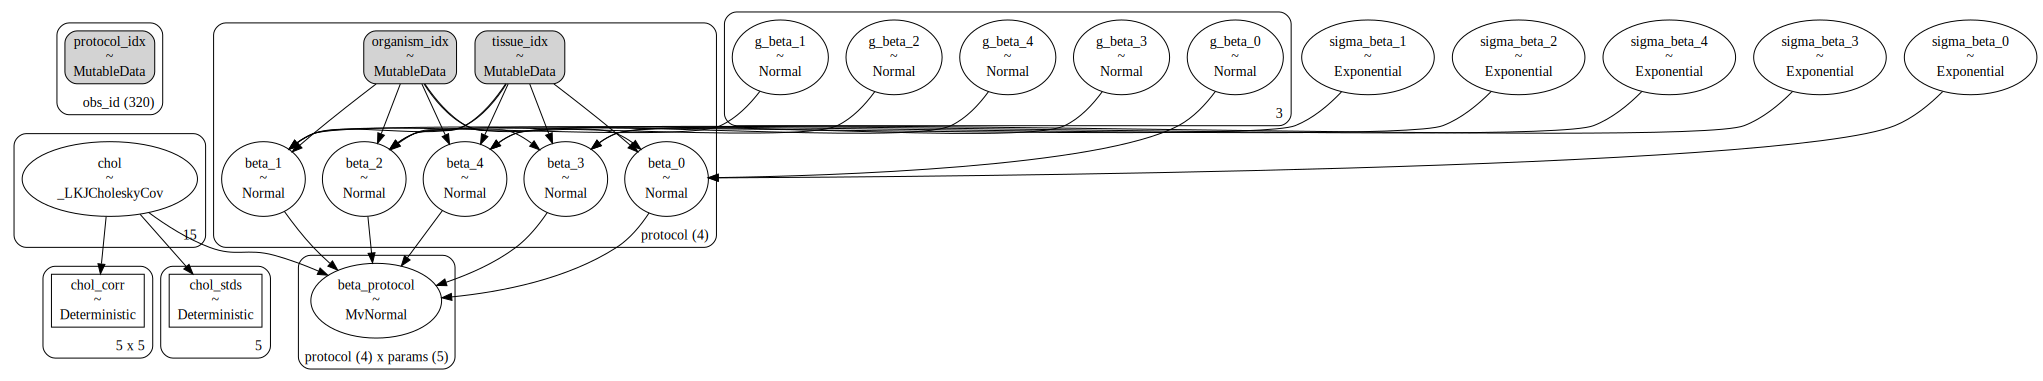

In [47]:
pm.model_to_graphviz(assay_level_model)

In [48]:
with assay_level_model:
    tr_assay = pm.sample(500, tune=500, init="adapt_diag",chains=4,cores=8)


/opt/anaconda3/lib/python3.9/site-packages/pymc/aesaraf.py:1005: UserWarning: The parameter 'updates' of aesara.function() expects an OrderedDict, got <class 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (collections.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just convert your dictionary to this type before the call as the conversion will still be non-deterministic.
  aesara_function = aesara.function(
/opt/anaconda3/lib/python3.9/site-packages/pymc/aesaraf.py:1005: UserWarning: The parameter 'updates' of aesara.function() expects an OrderedDict, got <class 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (collections.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just convert your dictionary to this type before the call as the conversion 

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 500 tune and 500 draw iterations (2_000 + 2_000 draws total) took 582 seconds.


ValueError: conflicting sizes for dimension 'obs_id': length 400 on the data but length 320 on coordinate 'obs_id'

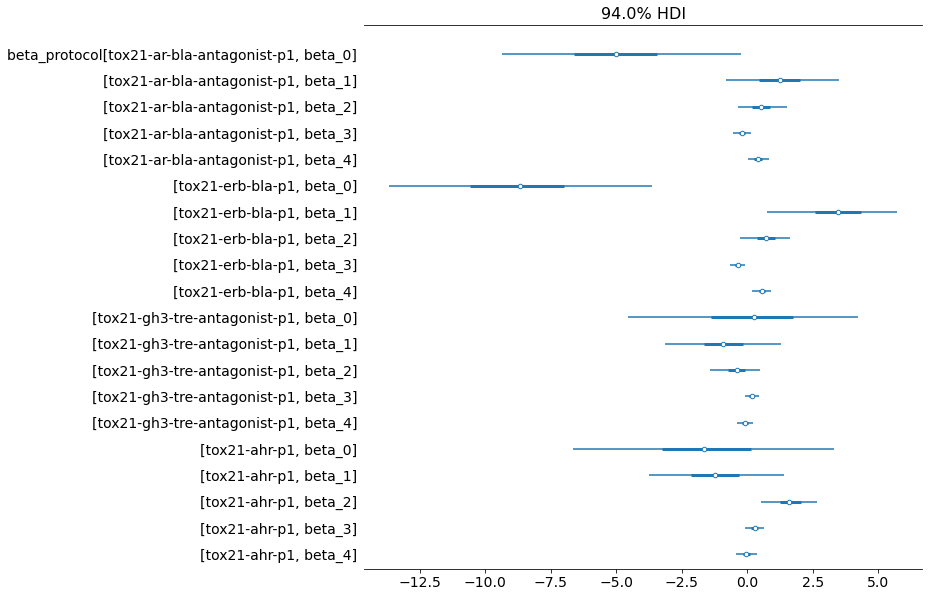

In [160]:
import arviz as az
with assay_level_model:
    az.plot_forest(
        tr_assay,
        combined=True,
        var_names=["beta_protocol"],
        figsize=(10, 10),
        textsize=14,
    )

In [90]:
with assay_level_model:
#     pm.set_data({'x': [5., 6., 9., 9.]})
    y_test = pm.sample_posterior_predictive(tr_assay, var_names=["beta_protocol"])
# y_test['obs'].mean(axis=0)

In [100]:
# y_test.posterior_predictive
print(y_test.posterior_predictive.beta_protocol)

<xarray.DataArray 'beta_protocol' (chain: 4, draw: 500, protocol: 4, params: 4)>
array([[[[-9.30425386e-01, -2.95376070e-01,  5.94477502e-01,
           2.81880869e+00],
         [-8.52359578e+00,  3.79434062e+00,  2.56870677e-01,
           6.58848614e-01],
         [-3.06884971e-01,  2.47205238e-01,  5.58264844e-01,
          -7.84736534e-01],
         [-2.72505188e+00, -4.33790120e+00,  1.50202428e+00,
           2.57851959e+00]],

        [[-8.60068689e-01, -3.05922988e+00,  9.75419786e-02,
          -1.56350517e+00],
         [-6.99669217e+00,  1.22419889e+00,  9.32757040e-01,
           7.59841161e-01],
         [-5.13089520e-01, -1.15853993e+00, -5.65729539e-01,
           1.90638836e-01],
         [-1.39484432e+00, -3.56962687e+00,  1.90306675e+00,
           8.07677994e-01]],

        [[-4.48207312e+00,  1.79500259e+00,  3.62126603e-01,
           1.60833571e+00],
...
         [-1.57024054e+00, -9.17873094e-01,  1.98686730e+00,
           2.50013114e-01]],

        [[ 4.317413

<AxesSubplot:title={'center':'acceptance_rate'}>

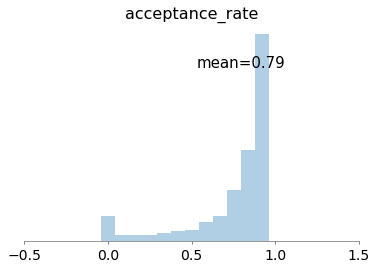

In [96]:
az.plot_posterior(
    tr_assay,
    group="sample_stats",
    var_names=["acceptance_rate"],
    hdi_prob="hide",
    kind="hist",
)

In [101]:
import pymc3
y_test.posterior_predictive['beta_protocol'].shape
az.plot_ppc(az.from_pymc3(posterior_predictive=y_test, model=assay_level_model))


AttributeError: 'Dataset' object has no attribute 'shape'

/opt/anaconda3/lib/python3.9/site-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (74) in plot_posterior, generating only 40 plots
  warnings.warn(


array([[<AxesSubplot:title={'center':'g_beta_0\n0'}>,
        <AxesSubplot:title={'center':'g_beta_0\n1'}>,
        <AxesSubplot:title={'center':'g_beta_0\n2'}>,
        <AxesSubplot:title={'center':'beta_0\ntox21-ar-bla-antagonist-p1'}>],
       [<AxesSubplot:title={'center':'beta_0\ntox21-erb-bla-p1'}>,
        <AxesSubplot:title={'center':'beta_0\ntox21-gh3-tre-antagonist-p1'}>,
        <AxesSubplot:title={'center':'beta_0\ntox21-ahr-p1'}>,
        <AxesSubplot:title={'center':'g_beta_1\n0'}>],
       [<AxesSubplot:title={'center':'g_beta_1\n1'}>,
        <AxesSubplot:title={'center':'g_beta_1\n2'}>,
        <AxesSubplot:title={'center':'beta_1\ntox21-ar-bla-antagonist-p1'}>,
        <AxesSubplot:title={'center':'beta_1\ntox21-erb-bla-p1'}>],
       [<AxesSubplot:title={'center':'beta_1\ntox21-gh3-tre-antagonist-p1'}>,
        <AxesSubplot:title={'center':'beta_1\ntox21-ahr-p1'}>,
        <AxesSubplot:title={'center':'g_beta_2\n0'}>,
        <AxesSubplot:title={'center':'g_beta_2\n1

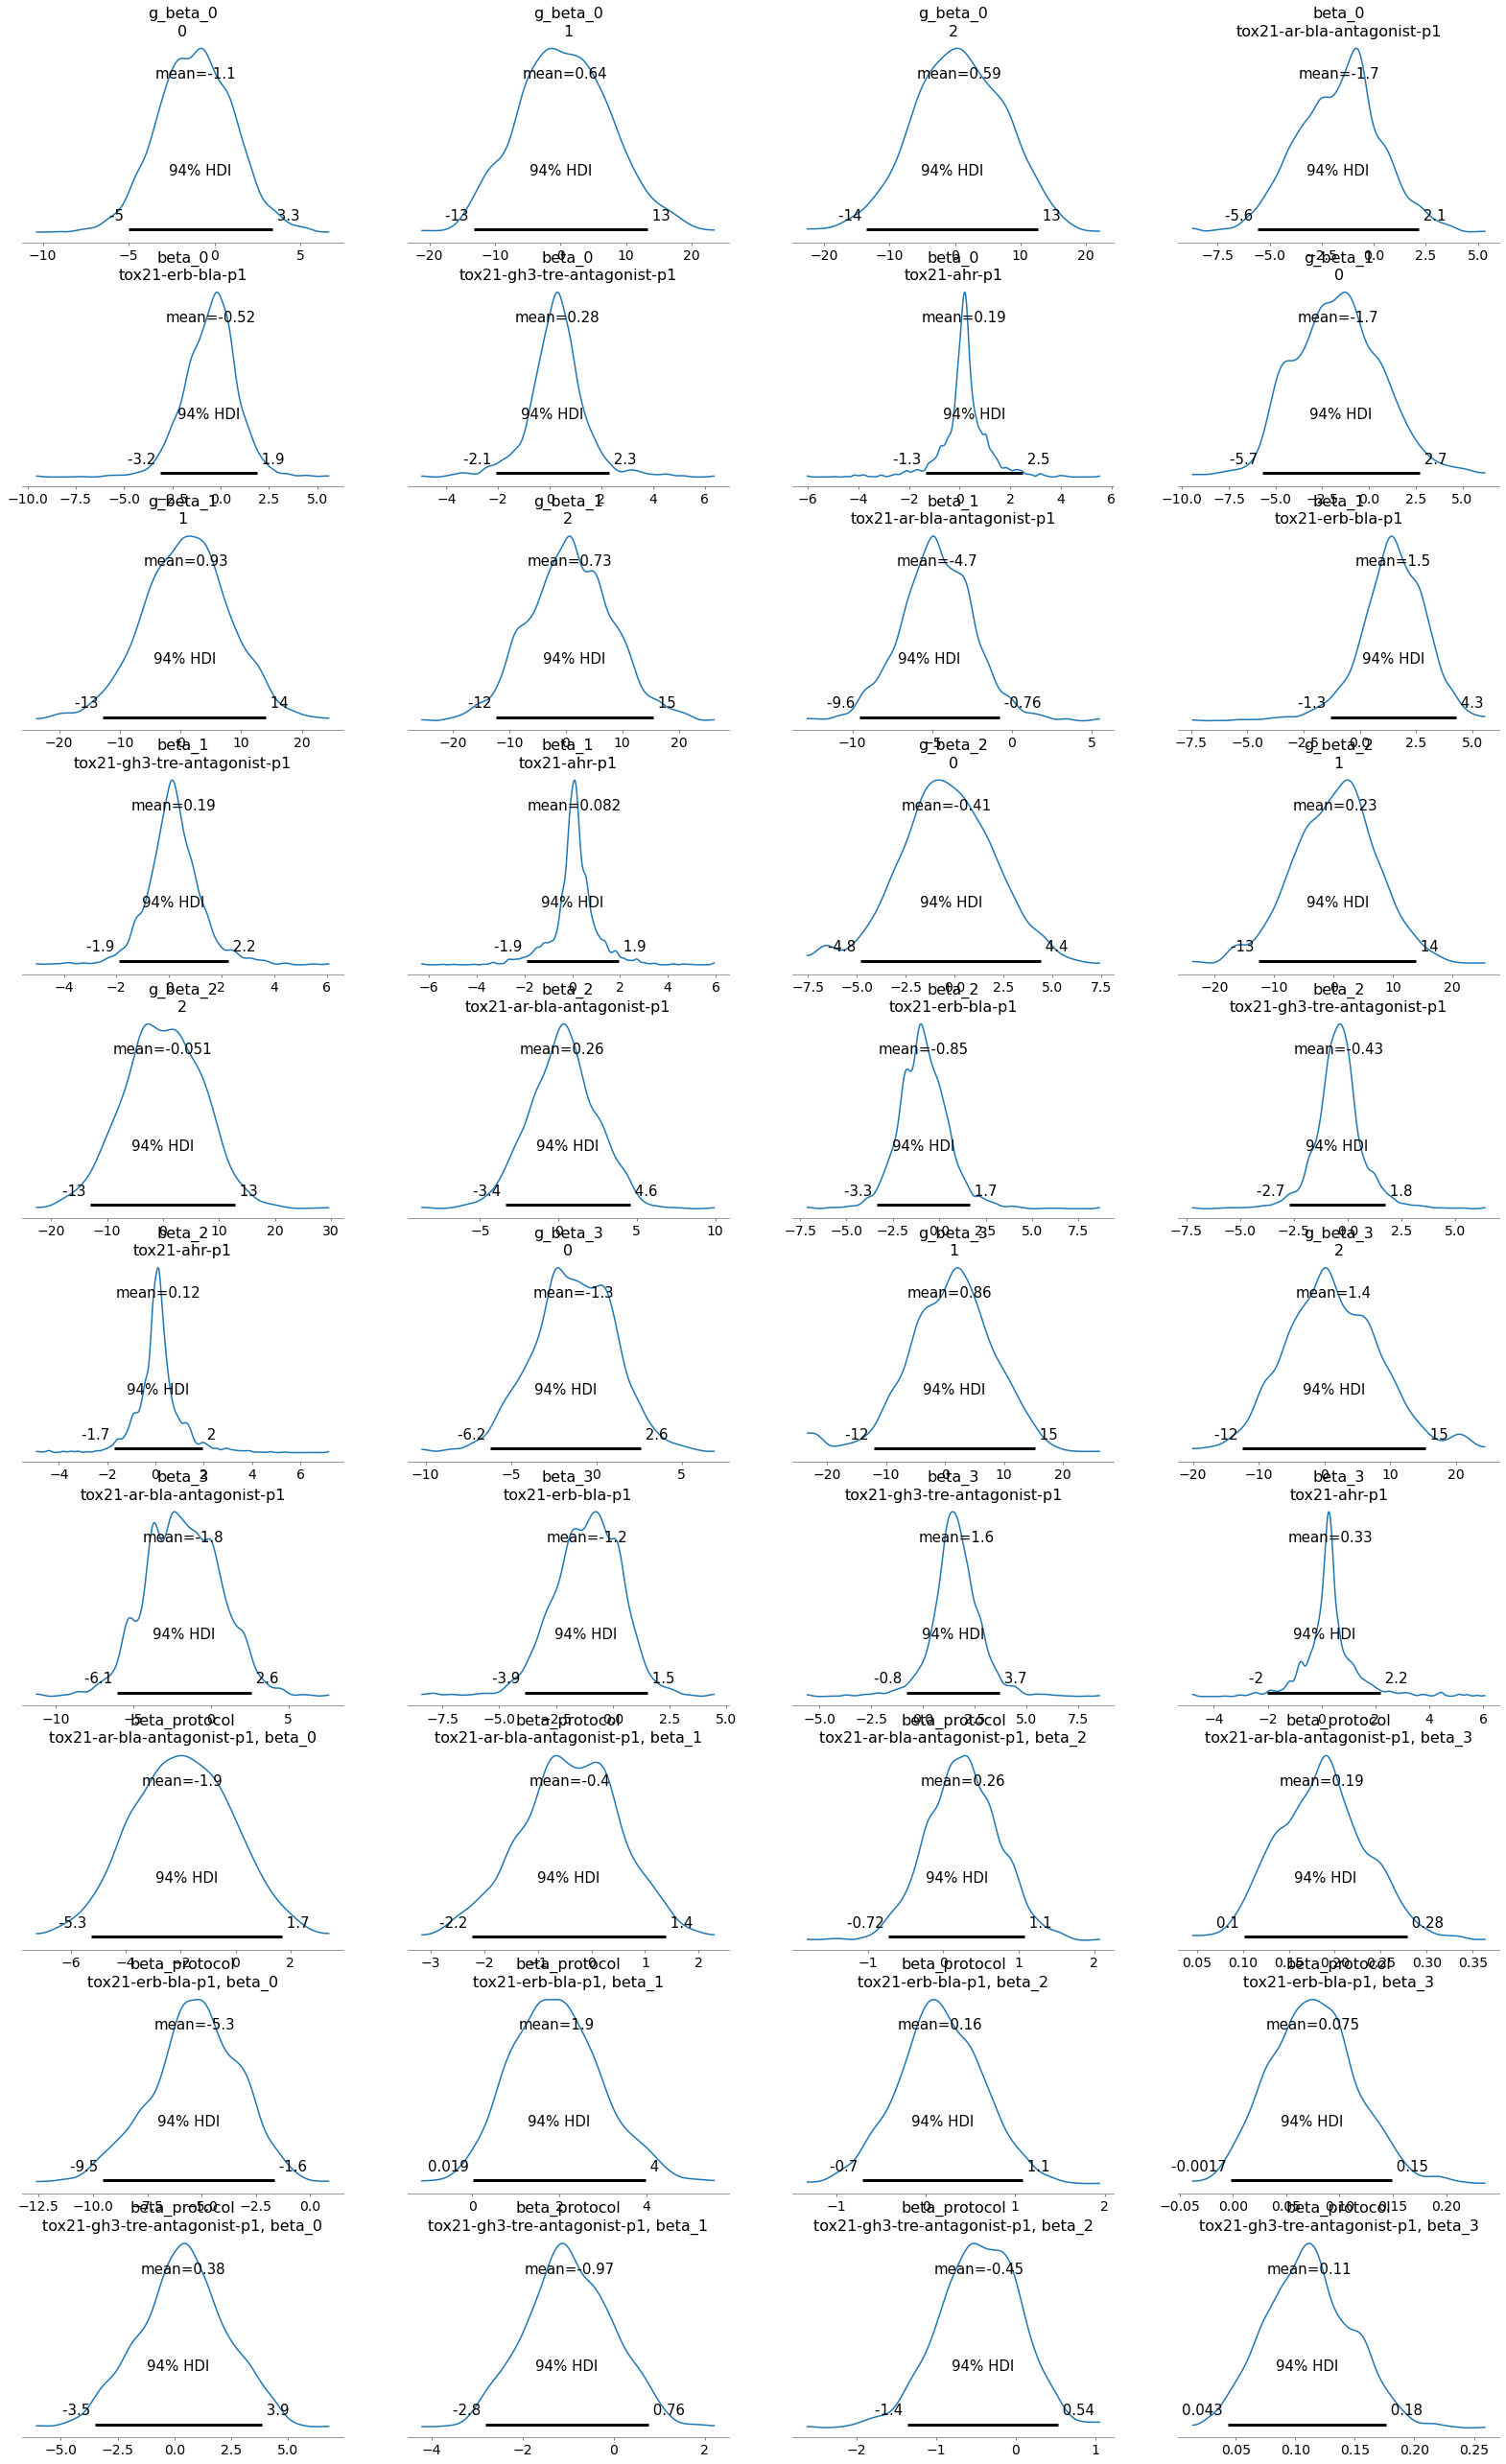

In [108]:
# az.plot_trace(tr_assay)
# import mat
az.plot_posterior(tr_assay)

# plt.show()

In [110]:
# from scipy.special import expit as logistic
# predictors_out_of_sample = np.random.normal(size=50)
# predictors_out_of_sample = chem_des[['BCUT2D_CHGHI', 'BCUT2D_MRLOW','Chi0n']]
# predictors_out_of_sample.insert(0,'Intercept',1)
# predictors_out_of_sample = np.asarray(predictors_out_of_sample)
# # outcomes_out_of_sample = np.random.binomial(
# #     1, logistic(true_intercept + true_slope * predictors_out_of_sample)
# # )

# with assay_level_model:
#     # update values of predictors:
#     pm.set_data({"pred": predictors_out_of_sample})
#     # use the updated values and predict outcomes and probabilities:
#     posterior_predictive = pm.sample_posterior_predictive(
#         tr_assay, var_names=["p"], random_seed=222
#     )
#     model_preds = posterior_predictive["p"]
with assay_level_model:
    display(az.summary(tr_assay, round_to=2).head(30))

/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
g_beta_0[0],-1.12,2.24,-5.03,3.34,0.08,0.07,726.90,681.02,1.00
g_beta_0[1],0.64,7.16,-13.27,13.30,0.30,0.21,589.85,1133.70,1.00
g_beta_0[2],0.59,7.08,-13.56,12.64,0.31,0.22,531.74,1169.64,1.00
beta_0[tox21-ar-bla-antagonist-p1],-1.68,2.05,-5.58,2.14,0.08,0.06,736.68,830.02,1.01
beta_0[tox21-erb-bla-p1],-0.52,1.37,-3.15,1.89,0.05,0.05,694.70,912.70,1.01
beta_0[tox21-gh3-tre-antagonist-p1],0.28,1.13,-2.10,2.30,0.04,0.04,973.28,721.17,1.01
beta_0[tox21-ahr-p1],0.19,0.95,-1.34,2.51,0.03,0.03,771.72,636.30,1.01
g_beta_1[0],-1.66,2.38,-5.72,2.69,0.10,0.11,498.66,566.57,1.02
g_beta_1[1],0.93,7.25,-12.87,14.12,0.33,0.35,486.41,562.02,1.02
g_beta_1[2],0.73,7.43,-12.33,15.42,0.36,0.26,434.51,552.90,1.02
